In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
adata = sc.read("pancreas_downstream_results_graph_cost.h5ad")

In [3]:
cell_types = ["Ngn3 low EP", "Ngn3 High early", "Ngn3 High late", "Fev+ Alpha", "Fev+ Beta", "Fev+ Delta", "Fev+ Epsilon", "Fev+ Pyy", "Alpha", "Beta", "Delta", "Epsilon"]
adata.obs["cell_type_ordered"] = pd.Categorical(adata.obs.celltype, categories=cell_types, ordered=True)

In [4]:
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/icb/dominik.klein/mambaforge/envs/

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


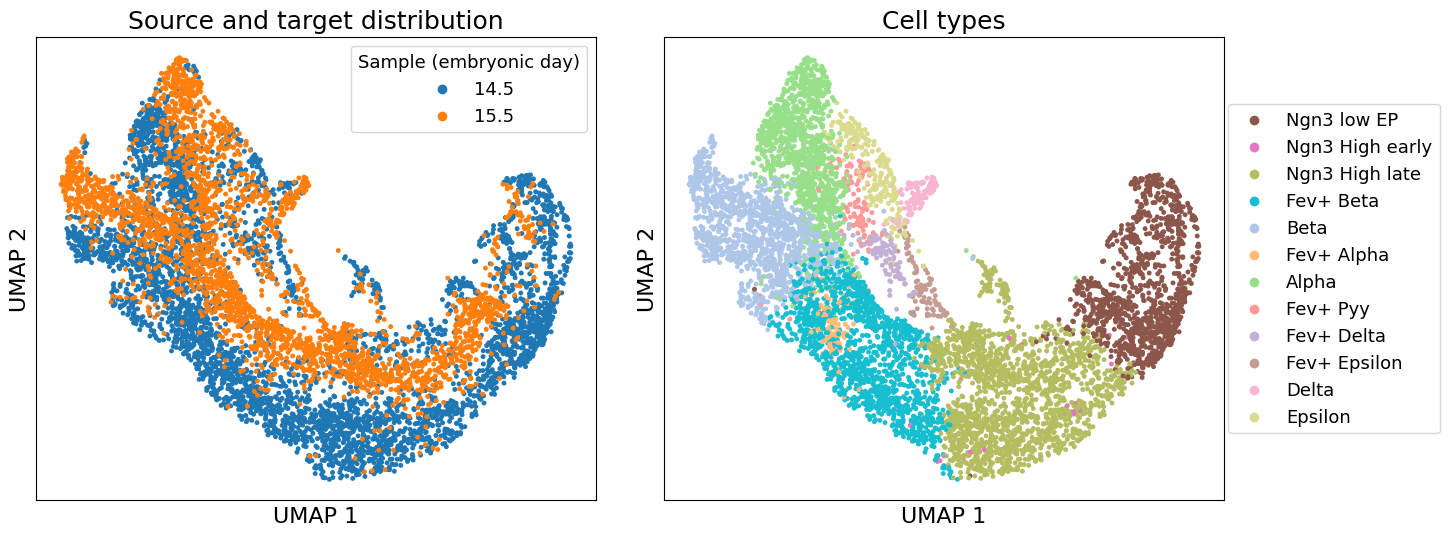

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sc.pl.umap(adata, color=["day"], ax=ax1, show=False, size=50)
ax1.legend(title="Sample (embryonic day)", fontsize=13, title_fontsize=13)
ax1.set_title("Source and target distribution", fontsize=18)
ax1.set_xlabel("UMAP 1", fontsize=16)
ax1.set_ylabel("UMAP 2", fontsize=16)
sc.pl.umap(adata, color=["celltype"], ax=ax2, show=False, size=50)
ax2.set_title("Cell types", fontsize=18)
ax2.set_xlabel("UMAP 1", fontsize=16)
ax2.set_ylabel("UMAP 2", fontsize=16)
ax2.legend(fontsize=13, loc='right', bbox_to_anchor=(1.4, 0.5))
plt.tight_layout(pad=3.0)
plt.show()

In [6]:
fig.savefig("pancreas_downstream_supp_new.svg")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_650404/2773278827.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_yticklabels(g.get_yticklabels(), size = 15)


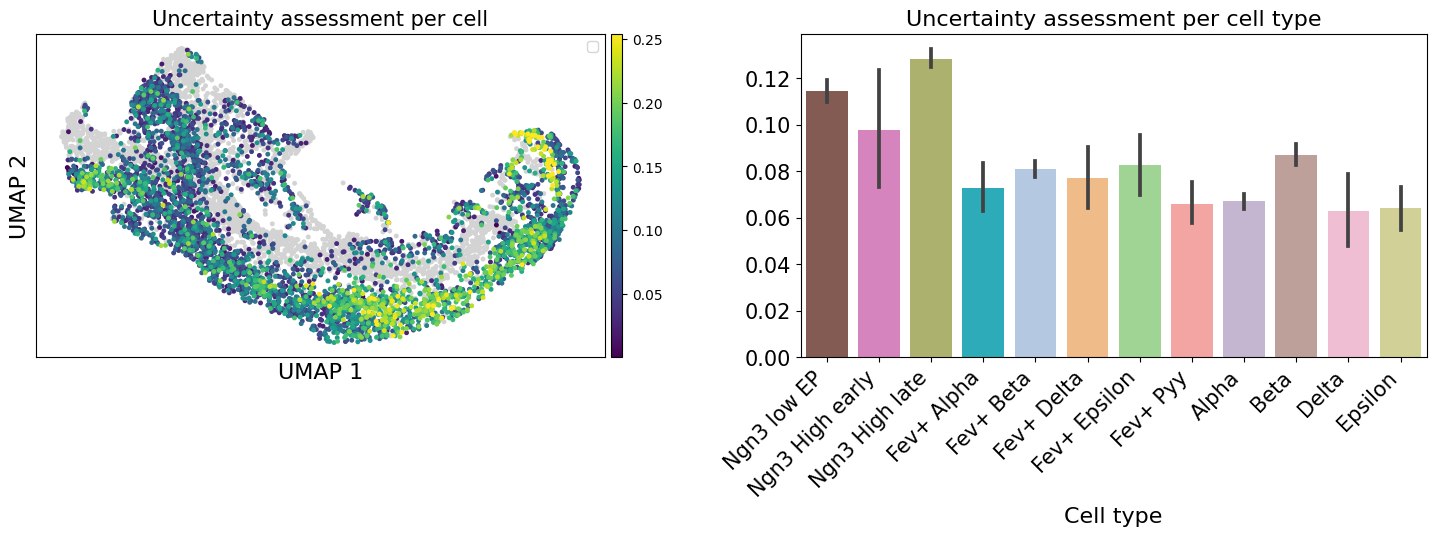

In [7]:
import seaborn as sns

sns.set_palette(palette=adata.uns['celltype_colors'])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
sc.pl.umap(adata, color=["directional_cosine_sim_variance"], ax=ax1, show=False, vmax="p99", size=50)
ax1.legend()
ax1.set_xlabel("UMAP 1", fontsize=16)
ax1.set_ylabel("UMAP 2", fontsize=16)
ax1.set_title(r"Uncertainty assessment per cell", fontsize=15)

g = sns.barplot(adata.obs, x="cell_type_ordered", y="directional_cosine_sim_variance", ax=ax2)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
g.set_title("Uncertainty assessment per cell type", fontsize=16)
#g.set_ylabel(r"$\operatorname{Var}_{\mathbf{y}_1, \mathbf{y}_2 \sim \hat{\pi}_\varepsilon(\cdot | \mathbf{x})})[\operatorname{S}_c(\mathbf{y}_1, \mathbf{y}_2)]$", fontsize=15)
g.set_xlabel("Cell type", fontsize=16)
g.set_ylabel(None)
g.set_xticklabels(g.get_xticklabels(), size = 15)
g.set_yticklabels(g.get_yticklabels(), size = 15)



plt.tight_layout(pad=3.0)
plt.show()

In [8]:
fig.savefig("pancreas_downstream_geodesic_cost.svg")

In [9]:
import numpy as np
pushed = np.load("pancreas_push_forwards_geodesic_cost.npy")

In [10]:
df_obs = pd.DataFrame(index = [f"pushed_{i}" for i in range(30)])

In [11]:
from anndata import AnnData
adata_pushed = AnnData(obs=df_obs)

In [12]:
adata.X = None

In [13]:
adata.obs["row_number"] = np.arange(len(adata))

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


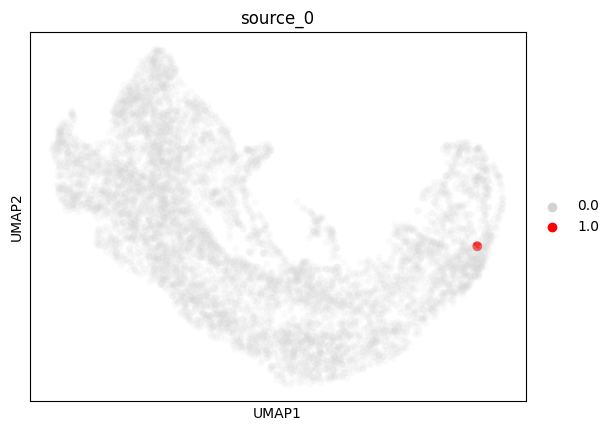

In [14]:
index = 7

sc_arr = np.zeros(len(adata),)
sc_arr[index] = 1.0
adata.obs["source_0"] = sc_arr
adata.obs["source_0"] = adata.obs["source_0"].astype("category")
sc_arr_sizes = (sc_arr + 1.0) * 100
sc_arr_alphas = np.ones_like(sc_arr) * 0.1
sc_arr_alphas[index] = 1.0
sc.pl.umap(adata, color="source_0", palette=["lightgray", "red"], size=sc_arr_sizes, alpha=sc_arr_alphas)

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


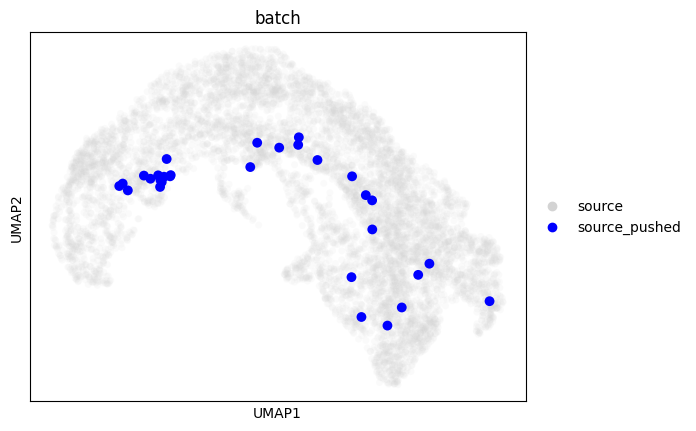

In [15]:
adata_pushed.obsm["X_pca"] = pushed[:,index,:]
adata_concat = sc.concat(
    [adata, adata_pushed],
    join="outer",
    label="batch",
    keys=["source", "source_pushed"],
)
sc.pp.neighbors(adata_concat, use_rep="X_pca")
sc.tl.umap(adata_concat)

custom_palette = ['lightgray', 'blue']

sc_arr = np.zeros(len(adata_concat),)
sc_arr[-30:] = 1.0
adata_concat.obs["source_0"] = sc_arr
adata_concat.obs["source_0"] = adata_concat.obs["source_0"].astype("category")
sc_arr_sizes = (sc_arr + 1.0) * 100
sc_arr_alphas = np.ones_like(sc_arr) * 0.1
sc_arr_alphas[-30:] = 1.0

sc.pl.umap(adata_concat, color=["batch"], palette=custom_palette, size=sc_arr_sizes, alpha=sc_arr_alphas)

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


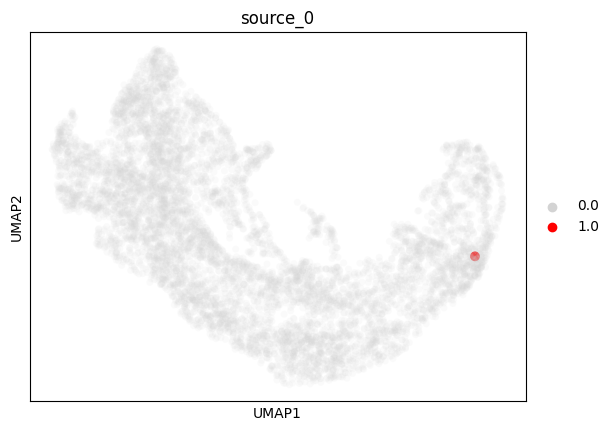

In [16]:
index = 10

sc_arr = np.zeros(len(adata),)
sc_arr[index] = 1.0
adata.obs["source_0"] = sc_arr
adata.obs["source_0"] = adata.obs["source_0"].astype("category")
sc_arr_sizes = (sc_arr + 1.0) * 100
sc_arr_alphas = np.ones_like(sc_arr) * 0.1
sc_arr_alphas[index] = 1.0
sc.pl.umap(adata, color="source_0", palette=["lightgray", "red"], size=sc_arr_sizes, alpha=sc_arr_alphas)

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


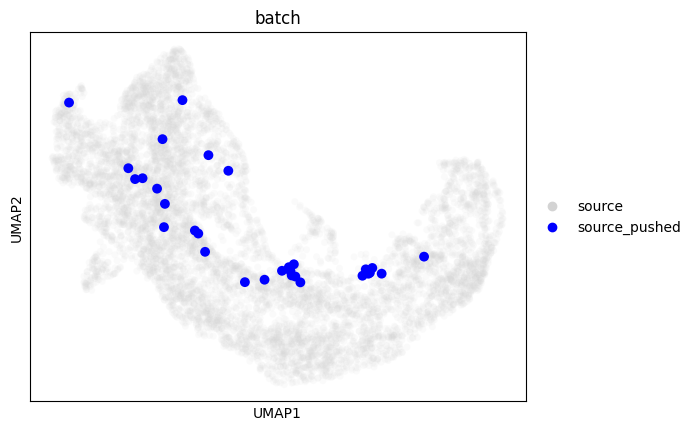

In [17]:
adata_pushed.obsm["X_pca"] = pushed[:,index,:]
adata_concat = sc.concat(
    [adata, adata_pushed],
    join="outer",
    label="batch",
    keys=["source", "source_pushed"],
)
sc.pp.neighbors(adata_concat, use_rep="X_pca")
sc.tl.umap(adata_concat)

custom_palette = ['lightgray', 'blue']

sc_arr = np.zeros(len(adata_concat),)
sc_arr[-30:] = 1.0
adata_concat.obs["source_0"] = sc_arr
adata_concat.obs["source_0"] = adata_concat.obs["source_0"].astype("category")
sc_arr_sizes = (sc_arr + 1.0) * 100
sc_arr_alphas = np.ones_like(sc_arr) * 0.1
sc_arr_alphas[-30:] = 1.0

sc.pl.umap(adata_concat, color=["batch"], palette=custom_palette, size=sc_arr_sizes, alpha=sc_arr_alphas)

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


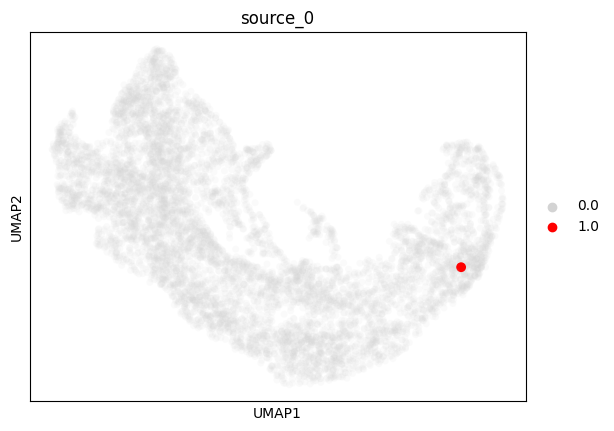

In [18]:
index = 4410

sc_arr = np.zeros(len(adata),)
sc_arr[index] = 1.0
adata.obs["source_0"] = sc_arr
adata.obs["source_0"] = adata.obs["source_0"].astype("category")
sc_arr_sizes = (sc_arr + 1.0) * 100
sc_arr_alphas = np.ones_like(sc_arr) * 0.1
sc_arr_alphas[index] = 1.0
sc.pl.umap(adata, color="source_0", palette=["lightgray", "red"], size=sc_arr_sizes, alpha=sc_arr_alphas)

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


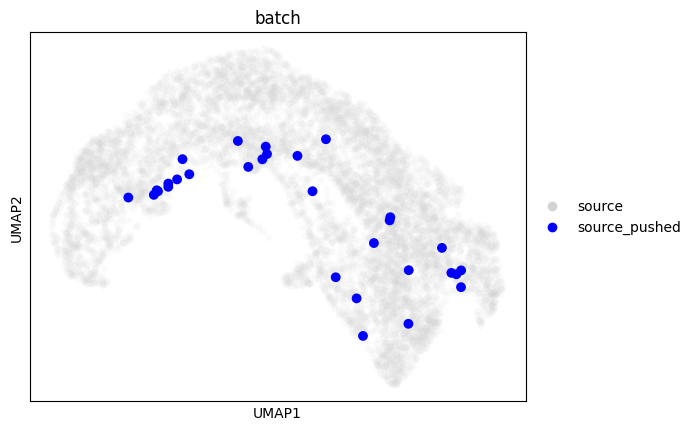

In [19]:
adata_pushed.obsm["X_pca"] = pushed[:,index,:]
adata_concat = sc.concat(
    [adata, adata_pushed],
    join="outer",
    label="batch",
    keys=["source", "source_pushed"],
)
sc.pp.neighbors(adata_concat, use_rep="X_pca")
sc.tl.umap(adata_concat)

custom_palette = ['lightgray', 'blue']

sc_arr = np.zeros(len(adata_concat),)
sc_arr[-30:] = 1.0
adata_concat.obs["source_0"] = sc_arr
adata_concat.obs["source_0"] = adata_concat.obs["source_0"].astype("category")
sc_arr_sizes = (sc_arr + 1.0) * 100
sc_arr_alphas = np.ones_like(sc_arr) * 0.1
sc_arr_alphas[-30:] = 1.0

sc.pl.umap(adata_concat, color=["batch"], palette=custom_palette, size=sc_arr_sizes, alpha=sc_arr_alphas)

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


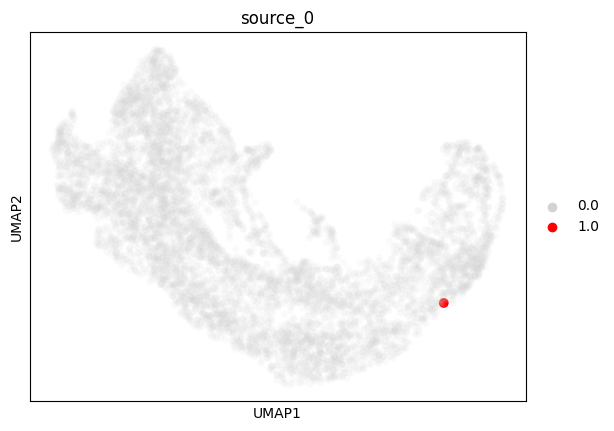

In [20]:
index = 22

sc_arr = np.zeros(len(adata),)
sc_arr[index] = 1.0
adata.obs["source_0"] = sc_arr
adata.obs["source_0"] = adata.obs["source_0"].astype("category")
sc_arr_sizes = (sc_arr + 1.0) * 100
sc_arr_alphas = np.ones_like(sc_arr) * 0.1
sc_arr_alphas[index] = 1.0
sc.pl.umap(adata, color="source_0", palette=["lightgray", "red"], size=sc_arr_sizes, alpha=sc_arr_alphas)

/home/icb/dominik.klein/mambaforge/envs/entot_pip/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


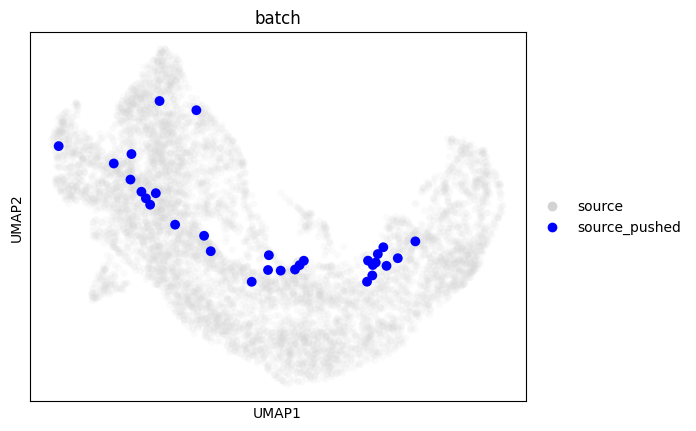

In [21]:
adata_pushed.obsm["X_pca"] = pushed[:,index,:]
adata_concat = sc.concat(
    [adata, adata_pushed],
    join="outer",
    label="batch",
    keys=["source", "source_pushed"],
)
sc.pp.neighbors(adata_concat, use_rep="X_pca")
sc.tl.umap(adata_concat)

custom_palette = ['lightgray', 'blue']

sc_arr = np.zeros(len(adata_concat),)
sc_arr[-30:] = 1.0
adata_concat.obs["source_0"] = sc_arr
adata_concat.obs["source_0"] = adata_concat.obs["source_0"].astype("category")
sc_arr_sizes = (sc_arr + 1.0) * 100
sc_arr_alphas = np.ones_like(sc_arr) * 0.1
sc_arr_alphas[-30:] = 1.0

sc.pl.umap(adata_concat, color=["batch"], palette=custom_palette, size=sc_arr_sizes, alpha=sc_arr_alphas)

In [28]:
df_geo = pd.read_csv("pancreas_agg_tm_geodesic_cost.csv", index_col=0)
df_l2 = pd.read_csv("pancreas_agg_tm_l2_cost.csv", index_col=0)

In [27]:
df

,Ngn3 low EP,Ngn3 High late,Fev+ Beta,Beta,Fev+ Alpha,Alpha,Fev+ Pyy,Fev+ Delta,Fev+ Epsilon,Delta,Epsilon
Ngn3 low EP,0.595533,0.154079,0.128399,0.140520,0.0,0.180365,0.15,0.235294,0.205128,0.137931,0.157895
Ngn3 High early,0.002481,0.006042,0.004532,0.005775,0.0,0.002283,0.00,0.000000,0.000000,0.000000,0.000000
Ngn3 High late,0.121588,0.345619,0.199396,0.172281,0.0,0.171233,0.25,0.294118,0.205128,0.103448,0.201754
Fev+ Beta,0.074442,0.199396,0.271903,0.176131,0.0,0.235160,0.15,0.235294,0.282051,0.482759,0.201754
Beta,0.066998,0.094260,0.114804,0.241578,0.0,0.125571,0.05,0.117647,0.025641,0.103448,0.122807
Fev+ Alpha,0.012407,0.019335,0.036254,0.024062,0.0,0.025114,0.00,0.000000,0.025641,0.034483,0.035088
Alpha,0.081886,0.127492,0.154079,0.173244,1.0,0.171233,0.30,0.117647,0.153846,0.103448,0.166667
Fev+ Pyy,0.014888,0.010272,0.031722,0.021174,0.0,0.025114,0.05,0.000000,0.076923,0.034483,0.017544
Fev+ Delta,0.007444,0.010272,0.013595,0.014437,0.0,0.009132,0.00,0.000000,0.000000,0.000000,0.000000
Fev+ Epsilon,0.009926,0.010876,0.018127,0.003850,0.0,0.018265,0.05,0.000000,0.000000,0.000000,0.026316


In [49]:
df_geo_red = df_geo[["Alpha", "Beta", "Delta", "Epsilon"]].loc[["Ngn3 low EP", "Ngn3 High late"]]

In [50]:
df_l2_red = df_l2[["Alpha", "Beta", "Delta", "Epsilon"]].loc[["Ngn3 low EP", "Ngn3 High late"]]

In [53]:
df_geo_red = df_geo_red.T
df_l2_red = df_l2_red.T

In [54]:
df_geo_red["cost"] = "geo"
df_l2_red["cost"] = "l2"

In [55]:
df_concat = pd.concat((df_geo_red, df_l2_red))

In [56]:
df_concat


,Ngn3 low EP,Ngn3 High late,cost
Alpha,0.180365,0.171233,geo
Beta,0.140520,0.172281,geo
Delta,0.137931,0.103448,geo
Epsilon,0.157895,0.201754,geo
Alpha,0.128370,0.005135,l2
Beta,0.203822,0.020170,l2
Delta,0.317308,0.048077,l2
Epsilon,0.242857,0.075000,l2


<Axes: ylabel='Ngn3 low EP'>

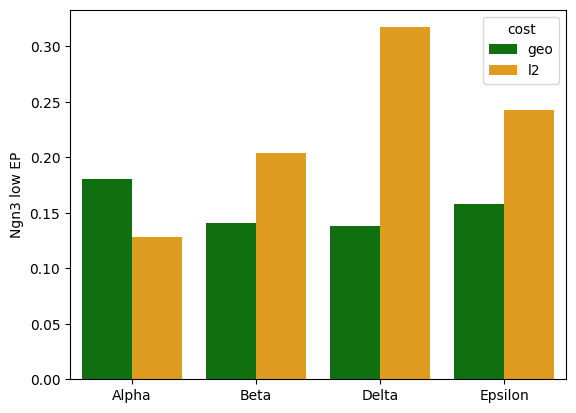

In [62]:
sns.barplot(df_concat, x=df_concat.index, y="Ngn3 low EP", hue="cost", palette=["green", "orange"])

<Axes: ylabel='Ngn3 High late'>

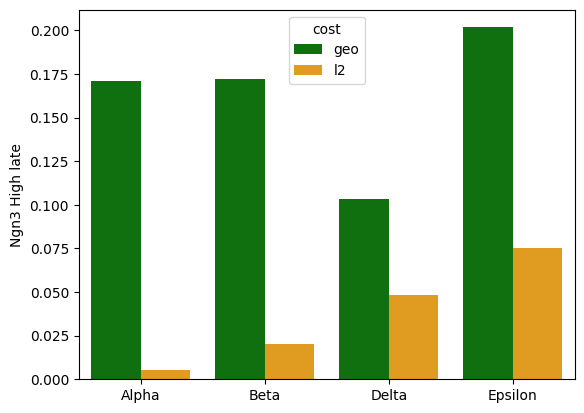

In [63]:
sns.barplot(df_concat, x=df_concat.index, y="Ngn3 High late", hue="cost", palette=["green"])